# Prepare the data

In [280]:
# Load the dataset
import pandas as pd

df = pd.read_csv("C:\\Users\\xnoor\\OneDrive - Lambton College\\Documents\\GitHub\\smart-price-api\\datasets\\transformed_ebay_data.csv")

In [291]:
# Inspect data overview
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Unnamed: 0  num__Price  num__Feedback Score  cat__Listing Type_Auction  \
0           0   -0.072931            -0.302147                        0.0   
1           1   -0.064066            -0.302491                        0.0   
2           2   -0.064802            -0.303912                        0.0   
3           3   -0.070170             3.955687                        0.0   
4           4   -0.029952            -0.297746                        0.0   

   cat__Listing Type_AuctionWithBIN  cat__Listing Type_FixedPrice  \
0                               1.0                           0.0   
1                               0.0                           1.0   
2                               0.0                           1.0   
3                               0.0                           1.0   
4                               0.0                           1.0   

   cat__Listing Type_StoreInventory  cat__Shipping Type_Calculated  \
0                    

In [292]:
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127778 entries, 0 to 127777
Data columns (total 61 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   Unnamed: 0                                              127778 non-null  int64  
 1   num__Price                                              127778 non-null  float64
 2   num__Feedback Score                                     127778 non-null  float64
 3   cat__Listing Type_Auction                               127778 non-null  float64
 4   cat__Listing Type_AuctionWithBIN                        127778 non-null  float64
 5   cat__Listing Type_FixedPrice                            127778 non-null  float64
 6   cat__Listing Type_StoreInventory                        127778 non-null  float64
 7   cat__Shipping Type_Calculated                           127778 non-null  float64
 8   ca

In [294]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0                                                    0
num__Price                                                    0
num__Feedback Score                                           0
cat__Listing Type_Auction                                     0
cat__Listing Type_AuctionWithBIN                              0
cat__Listing Type_FixedPrice                                  0
cat__Listing Type_StoreInventory                              0
cat__Shipping Type_Calculated                                 0
cat__Shipping Type_CalculatedDomesticFlatInternational        0
cat__Shipping Type_Flat                                       0
cat__Shipping Type_FlatDomesticCalculatedInternational        0
cat__Shipping Type_Free                                       0
cat__Shipping Type_FreePickup                                 0
cat__Shipping Type_Freight                                    0
cat__Shipping Type_NotSpecified                               0
cat__Top Rated Seller_F

# Insights on available categories

In [295]:
df['remainder__Category'].value_counts()

remainder__Category
Books                                             19305
Greeting Cards & Invitations                      19205
Wreaths, Garlands & Plants                        10293
Contemporary Manufacture                           8784
DVDs & Blu-ray Discs                               7280
Nativity Items                                     5831
Contemporary                                       4311
Vintage & Antique                                  4231
Gift Cards                                         3717
Other Games                                        3614
Gift Tags & Stickers                               2830
Plush Baby Toys                                    1574
Satellite Dishes                                   1405
Crystals                                           1395
VHS Tapes                                          1363
Blankets & Throws                                  1334
Playing Cards                                      1222
Mugs                        

In [296]:
# First, get the value counts for each category
value_counts = df['remainder__Category'].value_counts()

# Create a copy of df
df_view = df.copy()

# Define a function to categorize based on frequency
def categorize_frequency(count):
    if count >= 1000:
        return 'High Frequency'
    elif 12 <= count < 1000:
        return 'Medium Frequency'
    elif 4 <= count < 12:
        return 'Low Frequency'
    else:
        return 'Very Low Frequency'

# Apply the categorization function to the value counts in the view
df_view['Category_Frequency'] = df_view['remainder__Category'].map(value_counts).apply(categorize_frequency)

# Print the value_counts for the view only
print(df_view['Category_Frequency'].value_counts())

Category_Frequency
High Frequency        99971
Medium Frequency      25233
Low Frequency          1529
Very Low Frequency     1045
Name: count, dtype: int64


**Obervations**

Based on the result above, 

* There are 99,971 items categorized appear 1,000 times or more in the dataset. This indicates a few dominant categories that contribute to the majority of the data.

* A substantial 25,233 items show up between 12 and 999 times. These categories are relatively common but do not dominate the dataset as the high-frequency ones do.

* A total of 2,574 items fall into the "Low" and "Very Low" frequency categories, appearing fewer than 12 times.

**Disclaimer**

Because of this, when conducting the analysis below, I will start focusing on the high-frequency categories. 

This way I have enough information to examine price distributions and variances since these categories represent the bulk of the dataset. 

In [288]:
# Filtered out the category that have less than 1000 listings
threshold = 1000  
category_counts = df['remainder__Category'].value_counts()
filtered_categories = category_counts[category_counts > threshold].index
filtered_df = df[df['remainder__Category'].isin(filtered_categories)]

filtered_df['remainder__Category'].value_counts()
print(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 99971 entries, 0 to 127759
Data columns (total 61 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Unnamed: 0                                              99971 non-null  int64  
 1   num__Price                                              99971 non-null  float64
 2   num__Feedback Score                                     99971 non-null  float64
 3   cat__Listing Type_Auction                               99971 non-null  float64
 4   cat__Listing Type_AuctionWithBIN                        99971 non-null  float64
 5   cat__Listing Type_FixedPrice                            99971 non-null  float64
 6   cat__Listing Type_StoreInventory                        99971 non-null  float64
 7   cat__Shipping Type_Calculated                           99971 non-null  float64
 8   cat__Shipping Type_CalculatedDomesticFla

# Selecting categories with a median price within 50% range

In [297]:
# First, calculate the interquartile range (IQR) based on the percentiles in your existing data
price_stats['iqr'] = price_stats['p75'].astype(float) - price_stats['p25'].astype(float)

# Define a threshold, for example, focus only on categories with a median price within a specific range
filtered_price_stats = price_stats[(price_stats['median'].astype(float) >= -0.05) & 
                                   (price_stats['median'].astype(float) <= 0.05)]

# Print or visualize the filtered data
print(filtered_price_stats)

           remainder__Category min_price max_price    p25 median    p75  \
18  Wreaths, Garlands & Plants     -0.09      6.70  -0.03   0.01   0.08   
3     Contemporary Manufacture     -0.08     14.95  -0.05  -0.03  -0.01   
5         DVDs & Blu-ray Discs     -0.09      3.44  -0.06  -0.05  -0.02   
11              Nativity Items     -0.08      9.71  -0.03   0.01   0.10   
2                 Contemporary     -0.08      0.82  -0.07  -0.05  -0.04   
17           Vintage & Antique     -0.08      0.80  -0.06  -0.05  -0.04   
6                   Gift Cards     -0.08      1.45  -0.07  -0.01   0.13   
12                 Other Games     -0.08      2.68  -0.06  -0.04  -0.02   
14             Plush Baby Toys     -0.08      0.36  -0.05  -0.04  -0.01   
0            Blankets & Throws     -0.08      0.52  -0.05  -0.03  -0.00   
13               Playing Cards     -0.08      0.52  -0.05  -0.04  -0.03   
10                        Mugs     -0.08      0.45  -0.05  -0.04  -0.02   
9            Masks & Eye 

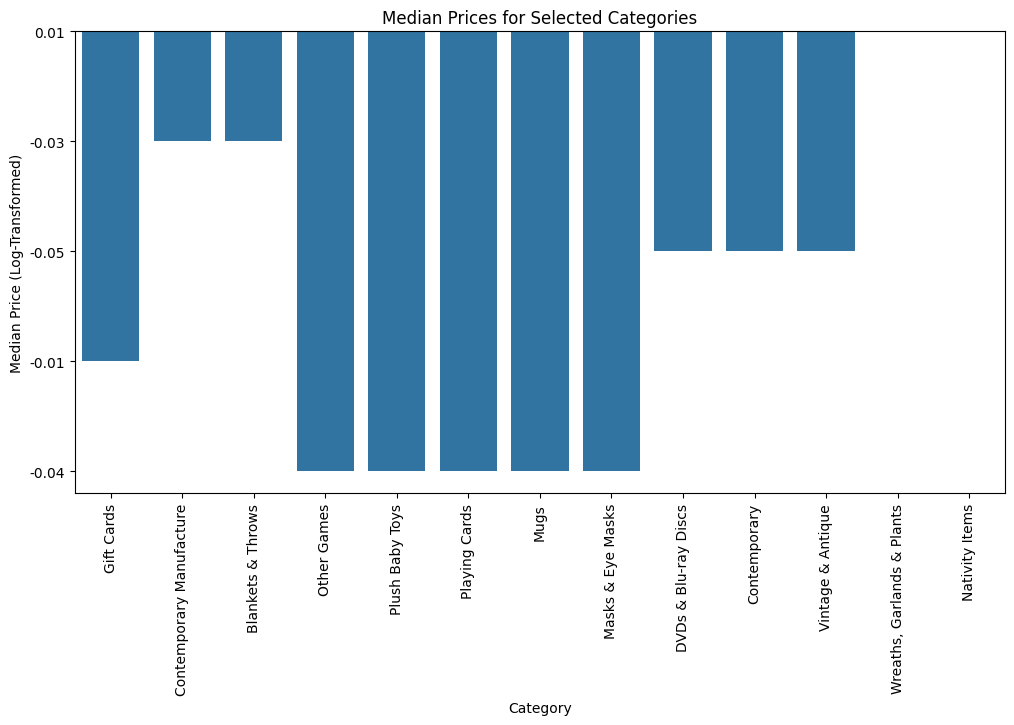

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_price_stats, x='remainder__Category', y='median', order=filtered_price_stats.sort_values('median')['remainder__Category'])
plt.xticks(rotation=90)
plt.title('Median Prices for Selected Categories')
plt.xlabel('Category')
plt.ylabel('Median Price (Log-Transformed)')
plt.show()

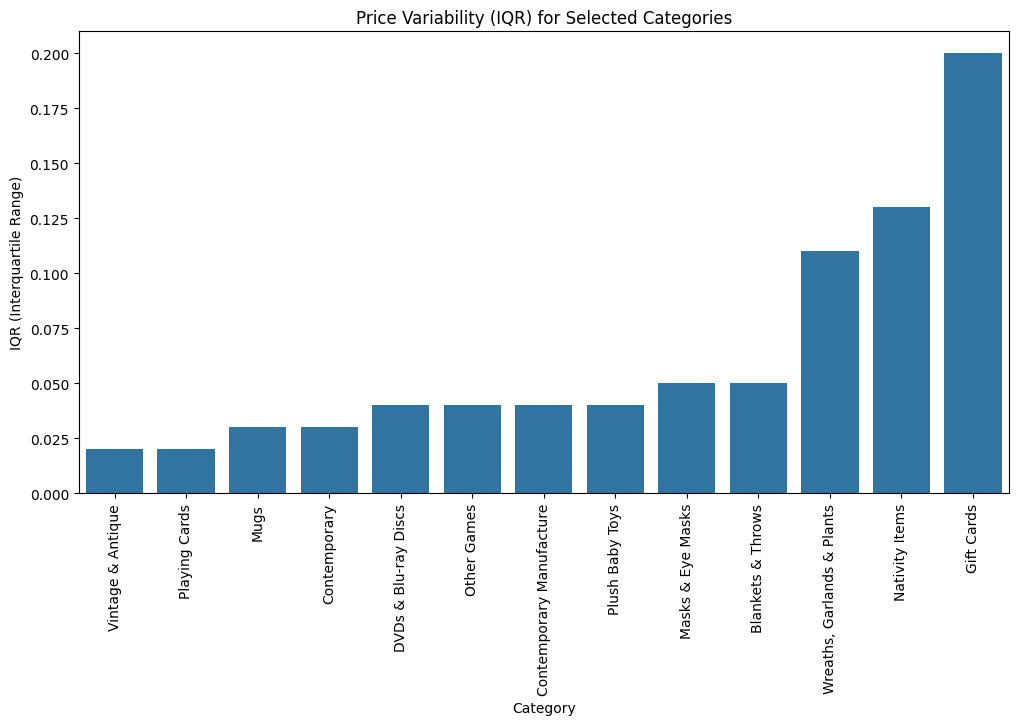

In [278]:
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_price_stats, x='remainder__Category', y='iqr', order=filtered_price_stats.sort_values('iqr')['remainder__Category'])
plt.xticks(rotation=90)
plt.title('Price Variability (IQR) for Selected Categories')
plt.xlabel('Category')
plt.ylabel('IQR (Interquartile Range)')
plt.show()

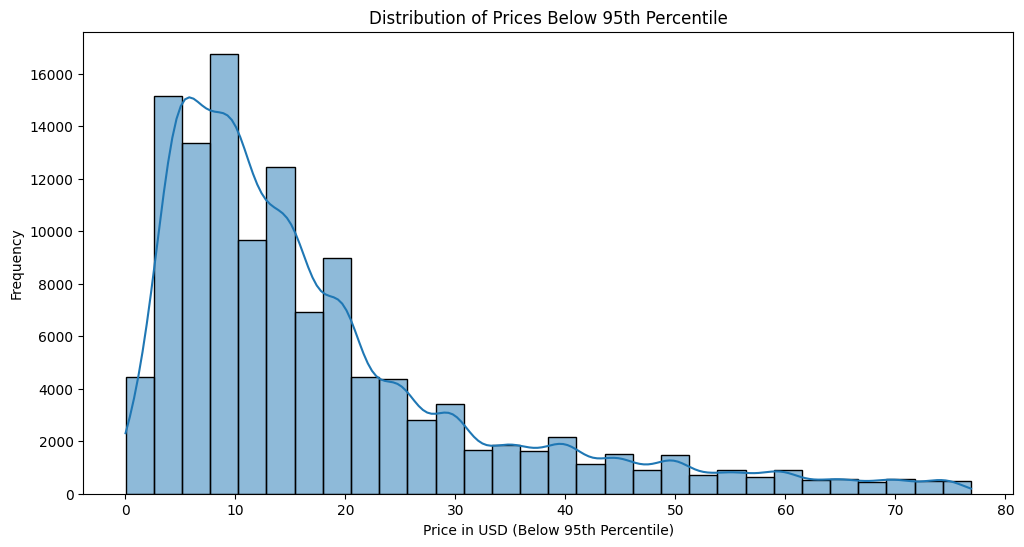

In [279]:
# Visualize the distribution of the 95% of the price

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the upper percentile (e.g., 95th percentile)
upper_percentile = 95
upper_limit = np.percentile(df['remainder__Price_in_USD'], upper_percentile)

# Filter the data
filtered_prices = df[df['remainder__Price_in_USD'] <= upper_limit]['remainder__Price_in_USD']

plt.figure(figsize=(12, 6))
sns.histplot(filtered_prices, bins=30, kde=True)
plt.xlabel(f'Price in USD (Below {upper_percentile}th Percentile)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Prices Below {upper_percentile}th Percentile')
plt.show()